### Activation functions
In this chapter we will visualize a simple Neural Network fitting a function. We will test different activation functions and see how they influence the fitting.
Let's define a very simple function to fit using a Neural Network.

In [18]:
def function(x):
    return 5*x**2 - 10*x + 3

Let's create a one hidden-layer neural network.

In [19]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


class SimpleNN(nn.Module):
    def __init__(self, hidden_size, activation):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, hidden_size)
        self.output = nn.Linear(hidden_size, 1)
        self.activation = activation

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        return self.output(x)


Let's generate some input data.

In [20]:
X_train = torch.normal(1, 1, size=(100,1))
Y_train = function(X_train)

x_func = torch.linspace(-5, 7, 1000).reshape(-1, 1)
y_func = function(x_func)

In [21]:
def update(i, model, criterion, optimizer, line, text):
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plotOutput = model(x_func)
    
    line.set_data(x_func, plotOutput.detach())
    text.set_text(f'Epoch: {i+1}\nLoss: {loss.item():.4f}')
    
    return line,

In [22]:
learning_rate = 5e-3

def getAnimation(hidden_size, activation):        
    fig, ax = plt.subplots()
    ax.set_ylim(-5, 7)
    ax.set_xlim(-5, 7)

    # Initialize the plot line
    line, = ax.plot([], [], lw=2)

    # Plot the original function (for comparison)
    ax.plot(x_func, y_func, label="Original Function", color='blue', linestyle='--')
    text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    
    # SimpleNN with ReLU
    model = SimpleNN(hidden_size, activation)

    criterion = nn.MSELoss() 
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)


    ani = FuncAnimation(fig, lambda i: update(i, model, criterion, optimizer, line, text), frames=np.arange(0, 2000), interval=20, blit=True)
    return ani

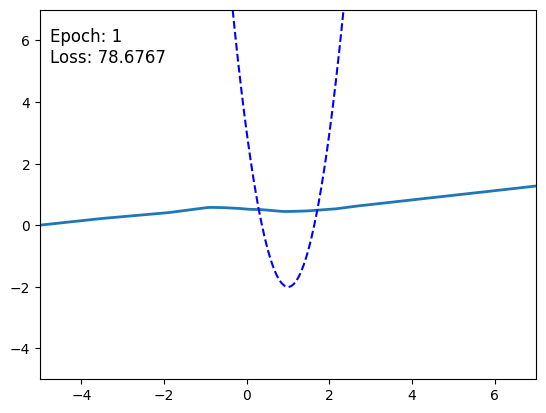

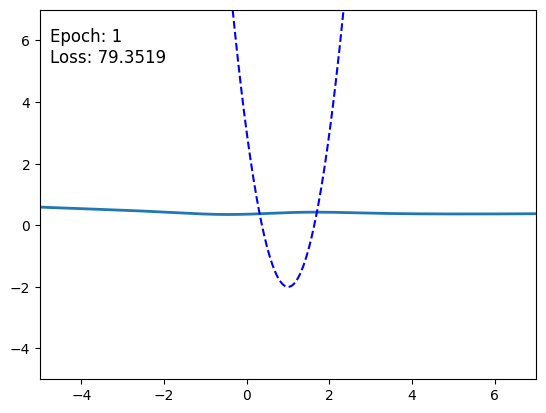

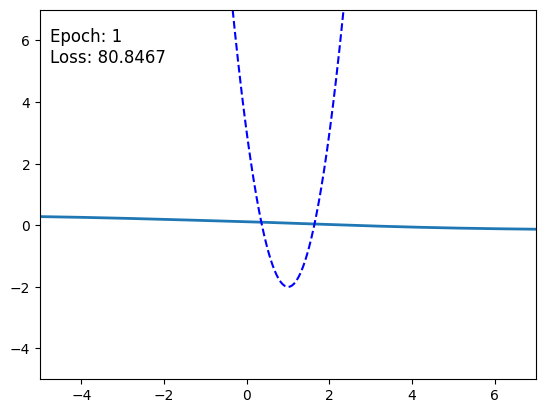

In [23]:
aniReLU = getAnimation(16, nn.ReLU())
aniSigmoid = getAnimation(16, nn.Sigmoid())
aniGeLU = getAnimation(16, nn.GELU())

In [24]:
HTML(aniReLU.to_html5_video())

In [25]:
HTML(aniSigmoid.to_html5_video())

In [26]:
HTML(aniGeLU.to_html5_video())

You can notice that Sigmoid is smoother than ReLU but requires way more epochs to train correctly. On the other hand, GeLU seems to keep the benefits of ReLU on this smaller model with the additional benefit of being smmoother.